In [1]:
# imports - usual suspects
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler

In [3]:
SQL = "SELECT * from `questrom.datasets.mtcars`"
YOUR_BILLING_PROJECT = "ba820-329602"
cars = pd.read_gbq(SQL, YOUR_BILLING_PROJECT)

In [5]:
cars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model
0,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,Merc 240D
1,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,Merc 230
2,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,Toyota Corona
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 Drive
4,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,Valiant


In [6]:
type(cars)
cars.shape

(32, 12)

In [9]:
#numpy 
x = np.array([1,3])
y = np.array([3,4])
z = np.array([2,4])
a = np.stack([x,y,z])
type(a)
a_df = pd.DataFrame(a)
a_df

,0,1
0,1,3
1,3,4
2,2,4


In [12]:
# create first distance
d1 = pdist(a)
print(d1)
type(d1)

#the condensed representation matrix
squareform(d1)

[2.23606798 1.41421356 1.        ]


array([[0.        , 2.23606798, 1.41421356],
       [2.23606798, 0.        , 1.        ],
       [1.41421356, 1.        , 0.        ]])

In [14]:
cd = pdist(a, metric="cosine")
cd
squareform(cd)

array([[0.        , 0.0513167 , 0.01005051],
       [0.0513167 , 0.        , 0.01613009],
       [0.01005051, 0.01613009, 0.        ]])

In [15]:
#city block
cd = pdist(a, metric="cityblock")
cd
squareform(cd)

array([[0., 3., 2.],
       [3., 0., 1.],
       [2., 1., 0.]])

In [16]:
#sklearn
pairwise_distances(a_df, metric="euclidean")

array([[0.        , 2.23606798, 1.41421356],
       [2.23606798, 0.        , 1.        ],
       [1.41421356, 1.        , 0.        ]])

In [17]:
cars.dtypes

mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
model     object
dtype: object

In [22]:
# model column as index
cars = cars.set_index("model")

In [23]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [24]:
cars.isna().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [25]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [27]:
cars2 = cars[['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear','carb']]
cars2.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


<AxesSubplot:>

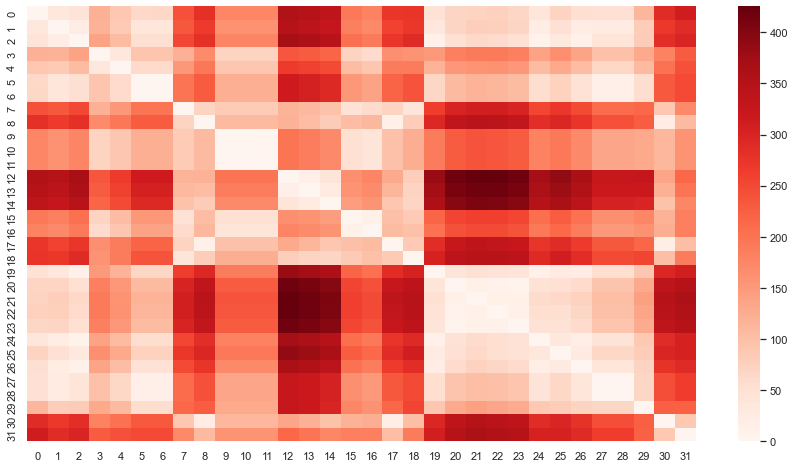

In [31]:
sns.set(rc = {'figure.figsize':(15,8)})
cdist = pdist(cars2.values)
cdist.shape
sns.heatmap(squareform(cdist), cmap="Reds")

In [35]:
# Our first cluster
hc1 = linkage(cdist)
type(hc1)

numpy.ndarray

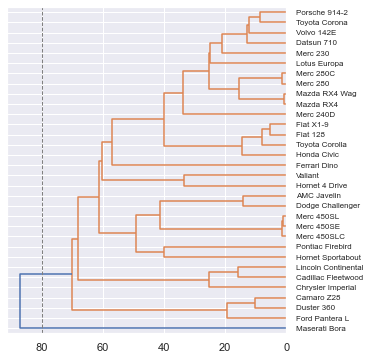

In [36]:
DIST = 80
plt.figure(figsize=(5,6))
dendrogram(hc1, 
           labels = cars.index,
           orientation = "left", 
           color_threshold = DIST)
plt.axvline(x=DIST, c='grey', lw=1, linestyle='dashed')
plt.show()

In [37]:
# how to identify the clusters
fcluster(hc1, 2, criterion="maxclust")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [44]:
cars2['cluster1'] = fcluster(hc1, 2, criterion="maxclust")
cars2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster1,cluster2
model,,,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,1


In [40]:
cars2.cluster1.value_counts()

1    31
2     1
Name: cluster1, dtype: int64

In [41]:
# distance assignement
c2 = fcluster(hc1, 80, criterion="distance")
c2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [43]:
cars2['cluster2'] = c2
cars2.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cluster1,cluster2
model,,,,,,,,,,,,,
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,1
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1,1,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,1
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,1


In [ ]:
# different linkage methods
linkage(cars2.values, method=)

# standardizing  values
